In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics

## Reference the Packages/Toolboxes
I use numpy to process arraies and matrices.  
I also use numpy.random.choice to implement my probability decision rule.  
I use pandas to read and process the original dataset.  
I use seaborn to implement kernel density estimation and  
to estimate the probability density functions of PD and PFA.  
I use matplotlib.pyplot to plot ROC.  
I use metrics from sklearn to calculate area under curve (AUC).

In [2]:
file_knn = "knn3DecisionStatistics.csv"
df_knn = pd.read_csv(file_knn, header = None)
arr_knn = df_knn.to_numpy()
arr_beta = np.zeros(3 + 2)
arr_beta[0] = 0.
arr_beta[1] = 0.33333
arr_beta[2] = 0.66667
arr_beta[3] = 1.
arr_beta[4] = float("inf")
print(arr_knn.shape)

(200, 2)


In [3]:
def divide_labels (arr_data) :
    alldat = np.copy(arr_data)
    dat_zero = alldat[alldat[:,0]==0, :]
    dat_one = alldat[alldat[:,0]==1, :]
    return dat_zero, dat_one
def compute_PFA (H0, thres) :
    H0_ds = np.sort(H0[:, 1])
    false_alarm = float(len(H0_ds[H0_ds >= thres])) / (H0.shape[0])
    return false_alarm
def compute_PD (H1, thres) :
    H1_ds = np.sort(H1[:, 1])
    detection = float(len(H1_ds[H1_ds >= thres])) / (H1.shape[0])
    return detection
def compute_ROC (arr_data, arr_thres) :
    arr_PD = np.zeros(len(arr_thres))
    arr_PFA = np.zeros(len(arr_thres))
    H0, H1 = divide_labels(arr_data)
    for i in range(len(arr_thres)) :
        arr_PD[i] = compute_PD(H1, arr_thres[i])
        arr_PFA[i] = compute_PFA(H0, arr_thres[i])
    return np.flipud(arr_PD), np.flipud(arr_PFA)

In [4]:
def plot_ROC (arr_data, arr_thres) :
    s1_pd, s1_pfa = compute_ROC(arr_data, arr_thres)
    auc1 = metrics.auc(s1_pfa, s1_pd)
    refln = np.linspace(0, 1, num = 101)
    figure, axis = plt.subplots()
    axis.plot(s1_pfa, s1_pd, label = "KNN (AUC = %.3f)" % auc1, linewidth = 3)
    axis.plot(refln, refln, "--", label = "Chance Diagonal", linewidth = 3)
    axis.set_xlabel("PFA", fontsize = 15)
    axis.set_ylabel("PD", fontsize = 15)
    axis.set_title("ROC Curve", fontsize = 15)
    axis.grid()
    figure.set_size_inches(8, 6)
    x_tick = np.linspace(0, 1, num = 11)
    y_tick = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1.0])
    plt.xticks(x_tick, fontsize = 12)
    plt.yticks(y_tick, fontsize = 12)
    plt.legend(loc = "lower right", fontsize = 12)
    plt.show()
    return None

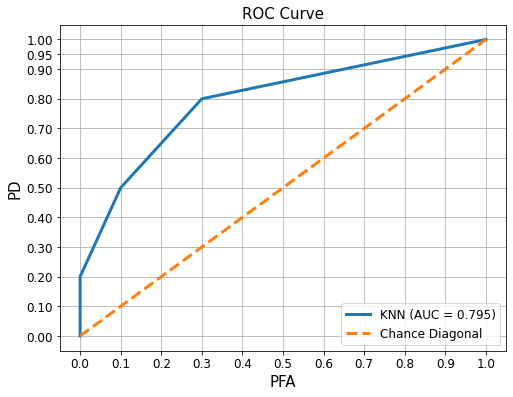

In [5]:
plot_ROC(arr_knn, arr_beta)

In [6]:
# 0.75 * 1.0 + 0.25 * 0.8 = 0.95
arr_thres = np.array([0.,   0.33333])
arr_prob  = np.array([0.75, 0.25])

In [7]:
def compute_prob_PD (H1, arr_thres, arr_prob) :
    prob_thres = np.random.choice(arr_thres, size = H1.shape[0], p = arr_prob)
    countd = 0
    totalh = H1.shape[0]
    for i in range(totalh) :
        if H1[i, 1] >= prob_thres[i] :
            countd = countd + 1
    detection = float(countd) / totalh
    return detection
def compute_prob_PFA (H0, arr_thres, arr_prob) :
    prob_thres = np.random.choice(arr_thres, size = H0.shape[0], p = arr_prob)
    countfa = 0
    totalh = H0.shape[0]
    for i in range(totalh) :
        if H0[i, 1] >= prob_thres[i] :
            countfa = countfa + 1
    false_alarm = float(countfa) / totalh
    return false_alarm

In [8]:
def simulate_PDR (arr_data, arr_thres, arr_prob, nums = 100) :
    simpd = np.zeros(nums)
    simpfa = np.zeros(nums)
    for i in range(nums) :
        H0, H1 = divide_labels(arr_data)
        simpd[i] = compute_prob_PD(H1, arr_thres, arr_prob)
        simpfa[i] = compute_prob_PFA(H0, arr_thres, arr_prob)
    return simpd, simpfa

In [9]:
# 0.75 * 1.0 + 0.25 * 0.8 = 0.95
arr_thres = np.array([0.,   0.33333])
arr_prob  = np.array([0.75, 0.25])

In [10]:
sim_pd, sim_pfa = simulate_PDR(arr_knn, arr_thres, arr_prob, 
                               nums = 100)

In [11]:
print(sim_pd.shape)
print(sim_pfa.shape)

(100,)
(100,)


In [12]:
avg_pd  = np.mean(sim_pd)
avg_pfa = np.mean(sim_pfa)
print("The Expected Value of PD  = %.2f" % avg_pd)
print("The Expected Value of PFA = %.2f" % avg_pfa)

The Expected Value of PD  = 0.95
The Expected Value of PFA = 0.82


The Expected Value of PD = 0.95
The probability density function of PD is shown below.


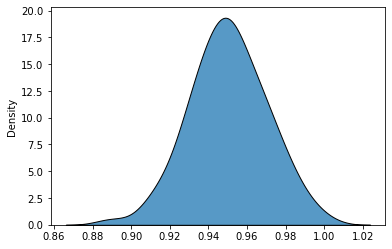

In [13]:
avg_pd = np.mean(sim_pd)
print("The Expected Value of PD = %.2f" % avg_pd)
print("The probability density function of PD is shown below.")
sns.kdeplot(data = sim_pd, multiple = "stack");

The Expected Value of PFA = 0.82
The probability density function of PFA is shown below.


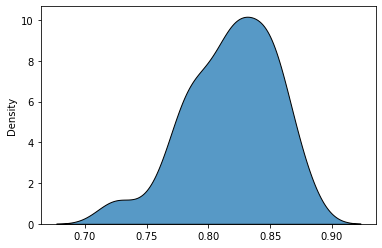

In [14]:
avg_pfa = np.mean(sim_pfa)
print("The Expected Value of PFA = %.2f" % avg_pfa)
print("The probability density function of PFA is shown below.")
sns.kdeplot(data = sim_pfa, multiple = "stack");

In [27]:
def plot_ROC_simulations (arr_data, arr_thres, simu_pd, simu_pfa) :
    s1_pd, s1_pfa = compute_ROC(arr_data, arr_thres)
    auc1 = metrics.auc(s1_pfa, s1_pd)
    refln = np.linspace(0, 1, num = 101)
    avg_pd = np.mean(simu_pd)
    avg_pfa = np.mean(simu_pfa)
    figure, axis = plt.subplots()
    axis.plot(s1_pfa, s1_pd, label = "KNN (AUC = %.3f)" % auc1, linewidth = 3)
    axis.plot(refln, refln, "--", label = "Chance Diagonal", linewidth = 3)
    axis.scatter(simu_pfa, simu_pd, c = "g", label = "All Simulation Pairs", linewidths = 1)
    axis.scatter(avg_pfa, avg_pd, c = "r", label = "Expected Operating Point", linewidths = 5)
    axis.set_xlabel("PFA", fontsize = 15)
    axis.set_ylabel("PD", fontsize = 15)
    axis.set_title("ROC Curve with All Simulation Pairs", fontsize = 15)
    axis.grid()
    figure.set_size_inches(10, 8)
    x_tick = np.linspace(0, 1, num = 11)
    y_tick = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1.0])
    plt.xticks(x_tick, fontsize = 12)
    plt.yticks(y_tick, fontsize = 12)
    plt.legend(loc = "lower right", fontsize = 12)
    plt.show()
    return None

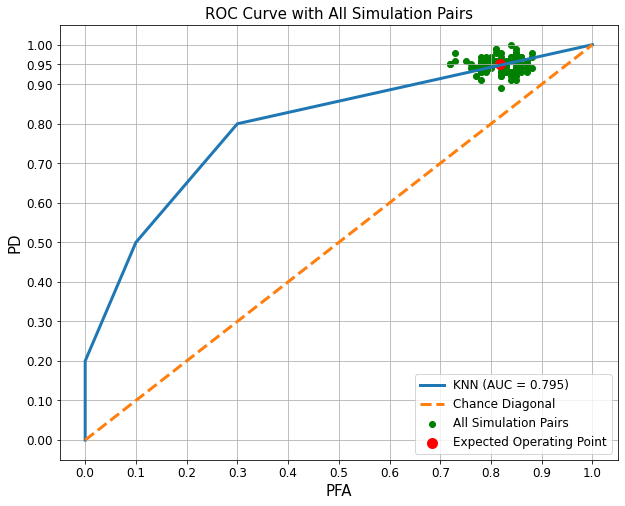

In [28]:
plot_ROC_simulations(arr_knn, arr_beta, sim_pd, sim_pfa)